In [2]:
import json
import os

In [22]:
tasks = ["math", "comprehensive", "logic"]

results_dir = "../outputs"

In [23]:
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

for task in tasks:
    all_files = os.listdir(os.path.join(results_dir, task, "aae-lora-gpt", "temperature_0.0"))
    for file in all_files:
        if not file.endswith("log.json"):
            results = json.load(open(os.path.join(results_dir, task, "aae-lora-gpt", "temperature_0.0", file)))
            if task == "math":
                results = [1 if r["correctness"][0] == 1 else 0 for r in results]
            else:
                results = [1 if r["correctness"][0] else 0 for r in results]

            gt = [1] * len(results)
            print(sum(results))
            print(task, file)
            print(classification_report(y_pred=results, y_true=[1] * len(results)))
            print('*' * 50)



120
math aave_True_cot_True.json
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57       300

    accuracy                           0.40       300
   macro avg       0.50      0.20      0.29       300
weighted avg       1.00      0.40      0.57       300

**************************************************
122
math aave_False_cot_False.json
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.41      0.58       300

    accuracy                           0.41       300
   macro avg       0.50      0.20      0.29       300
weighted avg       1.00      0.41      0.58       300

**************************************************
101
math aave_True_cot_False.json
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.34

In [24]:
import json
import os
import pandas as pd

# ... (rest of the code remains the same)

results_list = []  # Initialize an empty list to store the results

for task in tasks:
    all_files = os.listdir(os.path.join(results_dir, task, "aae-lora-gpt", "temperature_0.0"))
    for file in all_files:
        if not file.endswith("log.json"):
            results = json.load(open(os.path.join(results_dir, task, "aae-lora-gpt", "temperature_0.0", file)))
            if task == "math":
                results = [1 if r["correctness"][0] == 1 else 0 for r in results]
            else:
                results = [1 if r["correctness"][0] else 0 for r in results]

            gt = [1] * len(results)
            print(sum(results))
            print(task, file)
            print(classification_report(y_pred=results, y_true=[1] * len(results)))
            print('*' * 50)

            # Append the results to the list
            results_list.append({
                'Task': task,
                'File': file,
                'Accuracy': sum(results) / len(results),
                'Classification Report': classification_report(y_pred=results, y_true=[1] * len(results), output_dict=True)
            })

# Create a DataFrame from the results list
df = pd.DataFrame(results_list)

# Save the DataFrame to a CSV file
df.to_csv('../outputs/results.csv', index=False)

120
math aave_True_cot_True.json
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57       300

    accuracy                           0.40       300
   macro avg       0.50      0.20      0.29       300
weighted avg       1.00      0.40      0.57       300

**************************************************
122
math aave_False_cot_False.json
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.41      0.58       300

    accuracy                           0.41       300
   macro avg       0.50      0.20      0.29       300
weighted avg       1.00      0.41      0.58       300

**************************************************
101
math aave_True_cot_False.json
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.34

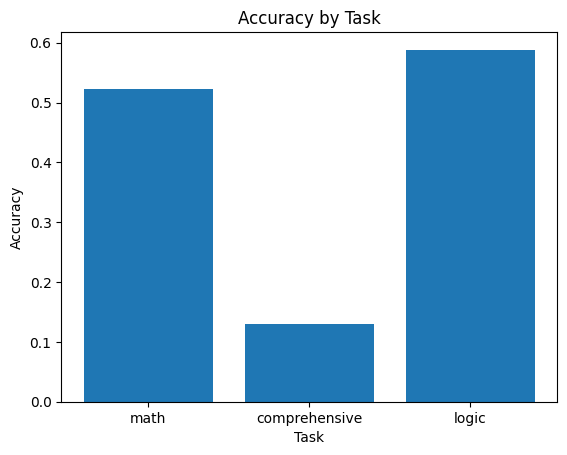

In [25]:
import matplotlib.pyplot as plt


# Create a figure and axis
fig, ax = plt.subplots()

# Plot the accuracy for each task
ax.bar(df['Task'], df['Accuracy'])

# Set the title and labels
ax.set_title('Accuracy by Task')
ax.set_xlabel('Task')
ax.set_ylabel('Accuracy')

# Show the plot
plt.show()

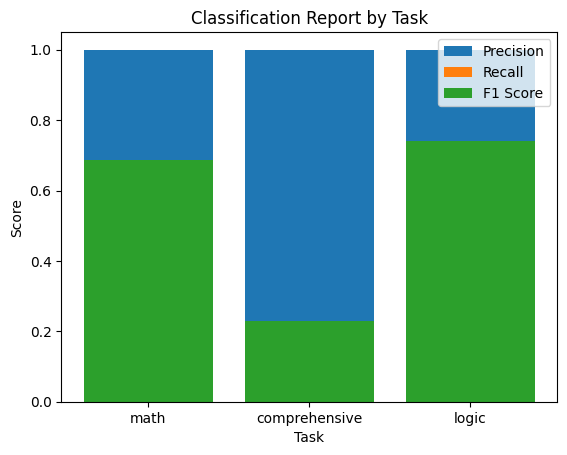

In [26]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the precision, recall, and F1 score for each task
ax.bar(df['Task'], [report['1']['precision'] for report in df['Classification Report']], label='Precision')
ax.bar(df['Task'], [report['1']['recall'] for report in df['Classification Report']], label='Recall')
ax.bar(df['Task'], [report['1']['f1-score'] for report in df['Classification Report']], label='F1 Score')

# Set the title and labels
ax.set_title('Classification Report by Task')
ax.set_xlabel('Task')
ax.set_ylabel('Score')

# Show the legend and plot
ax.legend()
plt.show()